A partir des données de ce dataset nous voulons étudier la corrélation entre les différents paramètres et l'amplitude des séismes et nous voulons prédire l'amplitude d'un séisme en fonction de paramètres donnés

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('earthquakes.csv')
data.shape

(23412, 21)

In [7]:
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [8]:
"""
Check column 100% NaN
"""
dropped_nan_col = []
for (columnName, columnData) in data.iteritems(): 
    if(data[columnName].isna().all() == True):
        dropped_nan_col.append(columnName)
print("{} feature have 100% NaN ".format(len(dropped_nan_col)))

0 feature have 100% NaN 


In [9]:
"""
Delete column more than 25% NaN
"""
def deal_nanp(df:pd.DataFrame, thresold: float):
    bf=[]
    for c in data.columns.to_list():
        if data[c].isna().sum()/data.shape[0] > thresold:
            bf.append(c)
    print("{} feature have more than {} NaN ".format(len(bf),thresold))
    print('\n\n - - - features - - -  \n {}'.format(bf))
    return bf
data = data.drop(deal_nanp(data, 0.25), axis=1)
data

8 feature have more than 0.25 NaN 


 - - - features - - -  
 ['Depth Error', 'Depth Seismic Stations', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square']


,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,US10007NL0,US,US,US,Reviewed


In [15]:
"""
drop specific column
"""
def drop_specific_col():
    dropped_sepcific_col = []
    dropped_sepcific_col.append('ID')
    dropped_sepcific_col.append('Location Source')
    dropped_sepcific_col.append('Magnitude Source')
    return dropped_sepcific_col

data = data.drop(drop_specific_col(), axis=1)
data

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,US,Reviewed


In [16]:
data.dtypes

Date               object
Time               object
Latitude          float64
Longitude         float64
Type               object
Depth             float64
Magnitude         float64
Magnitude Type     object
Source             object
Status             object
dtype: object

In [17]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()

ModuleNotFoundError: No module named 'sklearn'

ConversionError: Failed to convert value(s) to axis units: array(['MW', 'MW', 'MW', ..., 'MWW', 'MWW', 'MB'], dtype=object)

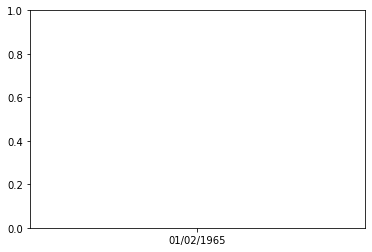

In [15]:
plt.hist(data)
plt.show()